# Externalized recordings: load data, visually inspect, preprocessing

In [3]:

import plotly
import plotly.graph_objs as go

# Importing Python and external packages


import os
import sys
import importlib
from importlib import reload 
from dataclasses import dataclass, field, fields
from itertools import compress
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

import scipy
from scipy import stats
from scipy import signal
from scipy.signal import spectrogram, hann, butter, filtfilt, freqz

import seaborn as sns
import pingouin as pg
from itertools import combinations
from statannotations.Annotator import Annotator

import openpyxl
from openpyxl import Workbook, load_workbook
# import xlrd
import pickle
import json
import csv

#mne
from pathlib import Path
import mne_bids
from mne_bids import (
    BIDSPath,
    inspect_dataset,
    mark_channels)
import mne
from mne.time_frequency import tfr_morlet 

#######################     USE THIS DIRECTORY FOR IMPORTING PYPERCEIVE REPO  #######################

# create a path to the BetaSenSightLongterm folder 
# and a path to the code folder within the BetaSenSightLongterm Repo
BetaSenSightLongterm_path = os.getcwd()
while BetaSenSightLongterm_path[-16:] != 'ResearchProjects':
    BetaSenSightLongterm_path = os.path.dirname(BetaSenSightLongterm_path)

# directory to PyPerceive code folder
PyPerceive_path = os.path.join(BetaSenSightLongterm_path,'PyPerceive_project', 'code', 'PyPerceive', 'code')
sys.path.append(PyPerceive_path)

# # change directory to PyPerceive code path within BetaSenSightLongterm Repo
os.chdir(PyPerceive_path)
os.getcwd()
from PerceiveImport.classes import (
    main_class, modality_class, metadata_class,
    session_class, condition_class, task_class,
    contact_class, run_class
)
import PerceiveImport.methods.load_rawfile as load_rawfile
import PerceiveImport.methods.find_folders as find_folders
import PerceiveImport.methods.metadata_helpers as metaHelpers

importlib.reload(main_class)
importlib.reload(session_class)
importlib.reload(task_class)
importlib.reload(condition_class)
importlib.reload(contact_class)
importlib.reload(metadata_class)
importlib.reload(modality_class)
importlib.reload(load_rawfile)
importlib.reload(find_folders)
importlib.reload(run_class)
importlib.reload(metaHelpers)
#######################     USE THIS DIRECTORY FOR WORKING WITH FOLDERS INSIDE OF CODE FOLDER OF BETASENSIGHTLONGTERM REPO  #######################


# create a path to the BetaSenSightLongterm folder 
# and a path to the code folder within the BetaSenSightLongterm Repo
current_path = os.getcwd()
while current_path[-16:] != 'ResearchProjects':
    current_path = os.path.dirname(current_path)

# directory to code folder
code_path = os.path.join(current_path, 'BetaSenSightLongterm','code', 'meet')
sys.path.append(code_path)

# # change directory to code path within BetaSenSightLongterm Repo
os.chdir(code_path)
os.getcwd()

import meet as meet
#######################     USE THIS DIRECTORY FOR WORKING WITH FOLDERS INSIDE OF CODE FOLDER OF BETASENSIGHTLONGTERM REPO  #######################


# create a path to the BetaSenSightLongterm folder 
# and a path to the code folder within the BetaSenSightLongterm Repo
current_path = os.getcwd()
while current_path[-16:] != 'ResearchProjects':
    current_path = os.path.dirname(current_path)

# directory to code folder
code_path = os.path.join(current_path, 'BetaSenSightLongterm','code', 'BetaSenSightLongterm')
sys.path.append(code_path)

# # change directory to code path within BetaSenSightLongterm Repo
os.chdir(code_path)
os.getcwd()
# tfr, processing
import src.bssu.tfr.BSSuPsd as BSSuPsd
import src.bssu.tfr.FastFourierPSD as FFpsd

# bipolar Channel Analysis
import src.bssu.bipolar.power_spectra_plots as power_spectra_plots
import src.bssu.bipolar.PeakFrequencies_PSD as PeakFrequency_psd
import src.bssu.bipolar.BIP_channelGroups as BIP_channelGroups
import src.bssu.bipolar.BIP_perChannelAnalysis as BIP_perChannel


# monopolar Referencing
import src.bssu.monopolar.MonoRef_JLB as MonoRefJLB
import src.bssu.monopolar.GroupMonopolarPSD as groupMonopol
import src.bssu.monopolar.monoRef_weightPsdAverageByCoordinateDistance as MonoRefWeightedCoordinateDistance
import src.bssu.monopolar.externalized_lfp as externalized

# Ranking Order
import src.bssu.ranking.HighestRankedChannelPSD as highestRank
import src.bssu.ranking.monopolPSDaverage_withinSubject as PSDaverageMonopol
import src.bssu.ranking.BIPchannelGroups_ranks as BIP_ranks
import src.bssu.ranking.Permutation_rankings as Permute_ranks


# Clinical stimulation parameters
import src.bssu.stimulation.activeStimulationContacts as activeStimContacts

# utility functions
import src.bssu.utils.loadResults as loadResults
import src.bssu.utils.find_folders as find_folders
import src.bssu.utils.writeGroupDataframes as writeGroupDF
import src.bssu.utils.load_data_files as load_data

# import Classes
from src.bssu.classes import (metadataAnalysis_class, mainAnalysis_class, sessionAnalysis_class, 
                              channelAnalysis_class, featureAnalysis_class, frequencyBand_class)

# import mni coordinates
import src.bssu.mni.load_rotated_coordinates as load_mni


importlib.reload(BSSuPsd)
importlib.reload(MonoRefJLB)
importlib.reload(loadResults)
importlib.reload(highestRank)
importlib.reload(groupMonopol)
importlib.reload(PSDaverageMonopol)
importlib.reload(FFpsd)
importlib.reload(find_folders)
importlib.reload(metadataAnalysis_class)
importlib.reload(mainAnalysis_class)
importlib.reload(sessionAnalysis_class)
importlib.reload(channelAnalysis_class)
importlib.reload(featureAnalysis_class)
importlib.reload(frequencyBand_class)
importlib.reload(PeakFrequency_psd)
importlib.reload(power_spectra_plots)
importlib.reload(BIP_channelGroups)
importlib.reload(BIP_ranks)
importlib.reload(activeStimContacts)
importlib.reload(Permute_ranks)
importlib.reload(BIP_perChannel)
importlib.reload(load_mni)
importlib.reload(writeGroupDF)
importlib.reload(MonoRefWeightedCoordinateDistance)
importlib.reload(load_data)
importlib.reload(externalized)
# load if you want to see complete Dataframes
pd.set_option("display.max_rows", None)

Excel file loaded:  patient_metadata.xlsx 
loaded from:  /Users/jenniferbehnke/Dropbox/work/ResearchProjects/Monopolar_power_estimation/data


## 5a. Externalized real monopolar recordings: WRITE dataframe

In [ ]:
%matplotlib widget

In [ ]:
patient_metadata = load_data.load_patient_metadata_externalized()

In [ ]:
sub_025 = load_data.load_BIDS_externalized_vhdr_files(sub="25")
sub_025

In [ ]:
processed_LFP = externalized.preprocess_externalized_lfp(
    sub=["25", "30", "32", "47", "52", "59", 
            "61", "64", "67", "69", "71", 
            "72", "75", "77", "79", "80"])

In [ ]:
group_data = processed_LFP["group_data"]
sub_025_1A = group_data.original_lfp.values[1]
sub_025_time = group_data.original_time_stamps[1]

sub025_original_2min = processed_LFP["mne_objects"]["25_original_2min"]
sub025_resampled_2min = processed_LFP["mne_objects"]["25_resampled_2min"]
sub025_resampled_2min.compute_psd(method="welch").plot()

In [ ]:

band_pass_filtered = data.filter(l_freq=5.0, h_freq=95.0)
# band pass and notch filter
filter_params = mne.filter.create_filter(
    data.get_data(), data.info["sfreq"], l_freq=5.0, h_freq=95.0
)
data.plot(highpass=5.0, lowpass=95.0, filtorder=5.0)

In [ ]:
# downsample to Percept sfreq
resampled = data.copy().resample(sfreq=250.0)
resampled.compute_psd(tmax=np.inf, fmax=125).plot(average=True, exclude="bads")
fig = data.compute_psd(tmax=np.inf, fmax=100).plot(average=True, exclude="bads")

In [ ]:
# butterworth filter: band pass -> filter order = 5, high pass 5 Hz, low-pass 95 Hz
# nodge filter: 48-52 Hz

# detect artefacts 
# remove artefacts (cut out)


## 5b. Externalized recordings: Load and plot 

load recording Info

In [4]:
rec_info = load_data.load_externalized_pickle(filename="externalized_recording_info_original")
rec_info

,subject,BIDS_id,ch_names,bads,sfreq,subject_info,number_time_stamps,recording_duration
original_information,025,sub-L001,"[LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...",[LFP_L_01_STN_MT],4000.0,"{'his_id': 'sub-L001', 'sex': 1, 'handedness':...",1216266,5.067775
original_information,030,sub-EL007,"[LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...",[LFP_L_01_STN_MT],4000.0,"{'his_id': 'sub-EL007', 'sex': 1, 'handedness'...",1242570,5.177375
original_information,032,sub-L003,"[LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...",[LFP_L_08_STN_MT],4000.0,"{'his_id': 'sub-L003', 'sex': 1, 'handedness':...",735460,3.064417
original_information,047,sub-L007,"[LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...",[LFP_L_01_STN_MT],4000.0,"{'his_id': 'sub-L007', 'sex': 2, 'handedness':...",1526564,6.360683
original_information,052,sub-EL014,"[LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...","[LFP_R_07_STN_MT, LFP_L_01_STN_MT]",4000.0,"{'his_id': 'sub-EL014', 'sex': 1, 'handedness'...",1767570,7.364875
original_information,059,sub-EL016,"[LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...","[LFP_L_01_STN_MT, ECOG_R_01_SMC_AT, ECOG_R_03_...",4000.0,"{'his_id': 'sub-EL016', 'sex': 1, 'handedness'...",1218774,5.078225
original_information,061,sub-L010,"[LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...",[LFP_L_01_STN_MT],4096.0,"{'his_id': 'sub-L010', 'sex': 1, 'handedness':...",1281540,5.2146
original_information,064,sub-L012,"[LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...",[LFP_R_01_STN_MT],4096.0,"{'his_id': 'sub-L012', 'sex': 1, 'handedness':...",823484,3.350765
original_information,067,sub-EL017,"[LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...",[LFP_L_01_STN_MT],4096.0,"{'his_id': 'sub-EL017', 'sex': 2, 'handedness'...",923040,3.755859
original_information,069,sub-L013,"[LFP_R_01_STN_MT, LFP_R_02_STN_MT, LFP_R_03_ST...",[LFP_L_01_STN_MT],4000.0,"{'his_id': 'sub-L013', 'sex': 2, 'handedness':...",1483570,6.181542


Load preprocessed data in a dataframe

In [21]:
preprocessed_data = load_data.load_externalized_pickle(filename="externalized_preprocessed_data")
preprocessed_data.head()

,BIDS_id,subject,hemisphere,original_ch_name,contact,original_lfp,resampled_lfp,original_time_stamps,resampled_time_stamps,original_sfreq,resampled_sfreq
LFP_R_01_STN_MT,sub-L001,025,Right,LFP_R_01_STN_MT,0,"[0.004980505859375, 0.00499101611328125, 0.004...","[0.004981967630519316, 0.004993935731201689, 0...","[0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...","[0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...",4000.0,250.0
LFP_R_02_STN_MT,sub-L001,025,Right,LFP_R_02_STN_MT,1A,"[0.04113792578125, 0.041147203125, 0.041153710...","[0.04113918003087577, 0.04115062690047614, 0.0...","[0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...","[0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...",4000.0,250.0
LFP_R_03_STN_MT,sub-L001,025,Right,LFP_R_03_STN_MT,1B,"[0.03457408203125, 0.034582628906249996, 0.034...","[0.03457557399192996, 0.03458711967239609, 0.0...","[0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...","[0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...",4000.0,250.0
LFP_R_04_STN_MT,sub-L001,025,Right,LFP_R_04_STN_MT,1C,"[0.036031136718749995, 0.03603557421875, 0.036...","[0.036032965327211765, 0.03604643947045076, 0....","[0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...","[0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...",4000.0,250.0
LFP_R_05_STN_MT,sub-L001,025,Right,LFP_R_05_STN_MT,2A,"[0.1043965625, 0.1044021015625, 0.104413085937...","[0.10439865455493076, 0.10441350059516627, 0.1...","[0.0, 0.00025, 0.0005, 0.00075, 0.001, 0.00125...","[0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024,...",4000.0,250.0


Load the MNE objects of the cropped 2 min LFP recordings

In [7]:
mne_objects = load_data.load_externalized_pickle(filename="mne_objects_cropped_2_min")
mne_objects

{'25_original_2min': <RawBrainVision | sub-L001_ses-LfpMedOff01_task-Rest_acq-StimOff_run-1_ieeg.eeg, 16 x 480001 (120.0 s), ~58.6 MB, data loaded>,
 '25_resampled_2min': <RawBrainVision | sub-L001_ses-LfpMedOff01_task-Rest_acq-StimOff_run-1_ieeg.eeg, 16 x 30000 (120.0 s), ~3.7 MB, data loaded>,
 '30_original_2min': <RawBrainVision | sub-EL007_ses-EcogLfpMedOff01_task-Rest_acq-StimOff_run-1_ieeg.eeg, 16 x 480001 (120.0 s), ~58.6 MB, data loaded>,
 '30_resampled_2min': <RawBrainVision | sub-EL007_ses-EcogLfpMedOff01_task-Rest_acq-StimOff_run-1_ieeg.eeg, 16 x 30000 (120.0 s), ~3.7 MB, data loaded>,
 '32_original_2min': <RawBrainVision | sub-L003_ses-LfpMedOff01_task-Rest_acq-StimOff_run-1_ieeg.eeg, 16 x 480001 (120.0 s), ~58.6 MB, data loaded>,
 '32_resampled_2min': <RawBrainVision | sub-L003_ses-LfpMedOff01_task-Rest_acq-StimOff_run-1_ieeg.eeg, 16 x 30000 (120.0 s), ~3.7 MB, data loaded>,
 '47_original_2min': <RawBrainVision | sub-L007_ses-LfpMedOffDys01_task-Rest_acq-StimOffDopa00_run-

In [22]:
mne_objects["25_original_2min"].ch_names

['LFP_R_01_STN_MT',
 'LFP_R_02_STN_MT',
 'LFP_R_03_STN_MT',
 'LFP_R_04_STN_MT',
 'LFP_R_05_STN_MT',
 'LFP_R_06_STN_MT',
 'LFP_R_07_STN_MT',
 'LFP_R_08_STN_MT',
 'LFP_L_01_STN_MT',
 'LFP_L_02_STN_MT',
 'LFP_L_03_STN_MT',
 'LFP_L_04_STN_MT',
 'LFP_L_05_STN_MT',
 'LFP_L_06_STN_MT',
 'LFP_L_07_STN_MT',
 'LFP_L_08_STN_MT']

In [28]:
4000 // 4

1000

In [24]:
mne_objects["25_original_2min"].get_data(picks="LFP_R_01_STN_MT")[0]

array([0.00498051, 0.00499102, 0.00499891, ..., 0.00503473, 0.00503231,
       0.00503487])

Plot the raw signals and filter line noise

In [9]:
# get an example original cropped signal
sub025_1A = preprocessed_data.original_lfp.values[1]
sub025_timestamps = preprocessed_data.original_time_stamps.values[1]
sub025_1A

array([0.04113793, 0.0411472 , 0.04115371, ..., 0.04123406, 0.04123497,
       0.04123966])

In [12]:
sub025_1A_resampled = preprocessed_data.resampled_lfp.values[1]
sub025_timestamps_resampled = preprocessed_data.resampled_time_stamps.values[1]
sub025_1A_resampled

array([0.04113918, 0.04115063, 0.04114793, ..., 0.04122739, 0.0412333 ,
       0.04123277])

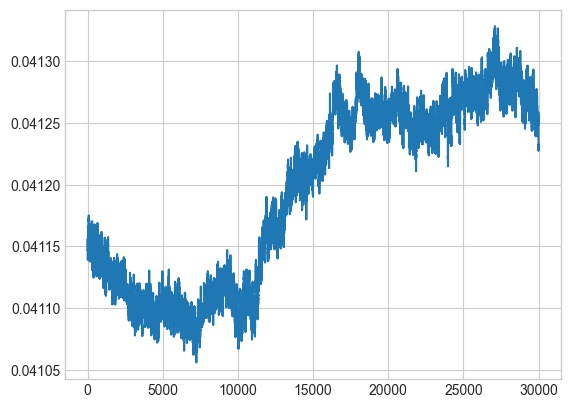

In [19]:
plt.plot(sub025_1A_resampled)

In [14]:
# FILTER: NOTCH and LOW, HIGH PASS
# sample frequency: 250 Hz
fs = preprocessed_data.resampled_sfreq.values[1]

# set filter parameters for band-pass filter
filter_order = 5 # in MATLAB spm_eeg_filter default=5 Butterworth
frequency_cutoff_low = 5 # 5Hz high-pass filter
frequency_cutoff_high = 95 # 95 Hz low-pass filter

# create the filter
b, a = scipy.signal.butter(filter_order, (frequency_cutoff_low, frequency_cutoff_high), btype='bandpass', output='ba', fs=fs)


In [15]:
band_pass_filtered = scipy.signal.filtfilt(b, a, sub025_1A_resampled)

(array([[7.98071017e-20, 2.64105174e-17, 4.62985666e-17, ...,
         4.94350477e-19, 1.06271528e-18, 1.07416914e-17],
        [1.32783932e-17, 8.67600924e-17, 1.32760661e-16, ...,
         3.12656235e-18, 6.10269766e-18, 4.44016548e-17],
        [2.03618504e-16, 1.73382491e-16, 4.33119546e-16, ...,
         1.75065918e-17, 6.60242314e-17, 3.13282691e-16],
        ...,
        [1.32119299e-23, 2.61365269e-24, 7.31139753e-24, ...,
         1.72354516e-23, 6.24051447e-24, 3.21289129e-23],
        [1.24912382e-23, 1.84830551e-24, 7.16104847e-24, ...,
         1.64816981e-23, 5.84048107e-24, 3.07123524e-23],
        [6.12807848e-24, 7.99833925e-25, 3.55578754e-24, ...,
         8.11838547e-24, 2.85551711e-24, 1.51238500e-23]]),
 array([  0.       ,   0.9765625,   1.953125 ,   2.9296875,   3.90625  ,
          4.8828125,   5.859375 ,   6.8359375,   7.8125   ,   8.7890625,
          9.765625 ,  10.7421875,  11.71875  ,  12.6953125,  13.671875 ,
         14.6484375,  15.625    ,  16.6015625,

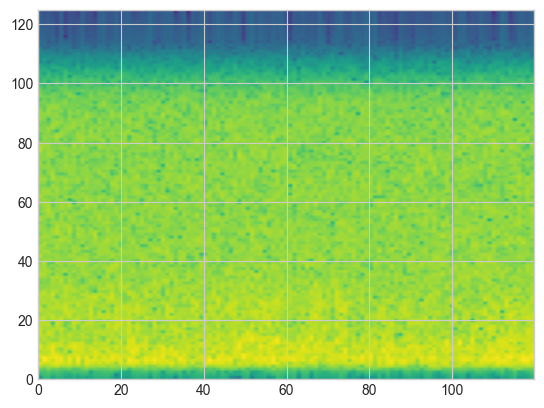

In [18]:
plt.specgram(
    x=band_pass_filtered,
    Fs=250,
    noverlap=0,
    cmap="viridis"
    )